## Naive Bayes on Donors choose dataset

### Applying NB on two sets of features
Set1 - Categorical,numerical features,preprocessed_essay(Bag of Words)

Set2 - Categorical,numerical features,preprocessed_essay(TFIDF) 

## Naive Bayes

In [1]:
!pip install chart_studio

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import pickle
from tqdm import tqdm
import os

from chart_studio import plotly
# import plotly.offline as offline
import plotly.graph_objs as go
from collections import Counter

## 1.1 Loading Data

In [3]:
import pandas as pd
data  = pd.read_csv('data.csv', nrows=50000)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


## 1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [4]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)
print('**'*50)

(33500, 8) (33500,)
(16500, 8) (16500,)
****************************************************************************************************


## 2) Make Data Model Ready

##2.1 Encoding Textual Features using BAG OF WORDS

In [5]:
# encoding essay attribute using count vectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=8000) ## taking 8000 distinct words which occure at least in 10 reviews(min_df = 10)
vectorizer.fit(X_train['essay'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_essay_bow=vectorizer.transform(X_train['essay'].values)
X_test_essay_bow=vectorizer.transform(X_test['essay'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_essay_bow.shape,y_train.shape)
print("test feature --",X_test_essay_bow.shape,y_test.shape)
print('**'*50)

# encoding school_state using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_feature_bow=vectorizer.get_feature_names()
X_train_school_state_bow=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_bow=vectorizer.transform(X_test['school_state'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_school_state_bow.shape,y_train.shape)
print("test feature --",X_test_school_state_bow.shape,y_test.shape)
print('the features are : ',school_state_feature_bow)
print('**'*50)

#encoding teacher_prefix using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_bow=vectorizer.get_feature_names()
X_train_teacher_prefix_bow=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_bow=vectorizer.transform(X_test['teacher_prefix'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_teacher_prefix_bow.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_bow.shape,y_test.shape)
print('the features are : ',teacher_prefix_feature_bow)
print('**'*50)

#encoding project_grade_category using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_bow=vectorizer.get_feature_names()
X_train_project_grade_category_bow=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_bow=vectorizer.transform(X_test['project_grade_category'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_project_grade_category_bow.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_bow.shape,y_test.shape)
print('the features are : ',project_grade_category_feature_bow)
print('**'*50)

#encoding clean_categories using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
clean_categories_feature_bow=vectorizer.get_feature_names()
X_train_clean_categories_bow=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_bow=vectorizer.transform(X_test['clean_categories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_categories_bow.shape,y_train.shape)
print("test feature --",X_test_clean_categories_bow.shape,y_test.shape)
print('the features are : ',clean_categories_feature_bow)
print('**'*50)

#encoding clean_subcategories using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
clean_subcategories_feature_bow=vectorizer.get_feature_names()
X_train_clean_subcategories_bow=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_bow=vectorizer.transform(X_test['clean_subcategories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_subcategories_bow.shape,y_train.shape)
print("test feature --",X_test_clean_subcategories_bow.shape,y_test.shape)
print('the features are : ',clean_subcategories_feature_bow)
print('**'*50)

 after encoding in bow the size of :
 train feature -- (33500, 8000) (33500,)
test feature -- (16500, 8000) (16500,)
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 51) (33500,)
test feature -- (16500, 51) (16500,)
the features are :  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 5) (33500,)
test feature -- (16500, 5) (16500,)
the features are :  ['dr', 'mr', 'mrs', 'ms', 'teacher']
*************************************************************************

## 2.2 Encoding Text features using TFIDF 

In [6]:
# encoding essay attribute 
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=8000)
vectorizer.fit(X_train['essay'].values)
essay_feature_TF=vectorizer.get_feature_names()
X_train_essay_TF=vectorizer.transform(X_train['essay'].values)
X_test_essay_TF=vectorizer.transform(X_test['essay'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_essay_TF.shape,y_train.shape)
print("test feature --",X_test_essay_TF.shape,y_test.shape)
print('**'*50)

# encoding school_state 
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_feature_TF=vectorizer.get_feature_names()
X_train_school_state_TF=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_TF=vectorizer.transform(X_test['school_state'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_school_state_TF.shape,y_train.shape)
print("test feature --",X_test_school_state_TF.shape,y_test.shape)
print('the features are : ',school_state_feature_TF)
print('**'*50)

#encoding teacher_prefix
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_TF=vectorizer.get_feature_names()
X_train_teacher_prefix_TF=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_TF=vectorizer.transform(X_test['teacher_prefix'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_teacher_prefix_TF.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_TF.shape,y_test.shape)
print('the features are : ',teacher_prefix_feature_TF)
print('**'*50)

#encoding project_grade_category 
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_TF=vectorizer.get_feature_names()
X_train_project_grade_category_TF=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_TF=vectorizer.transform(X_test['project_grade_category'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_project_grade_category_TF.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_TF.shape,y_test.shape)
print('the features are : ',project_grade_category_feature_TF)
print('**'*50)

#encoding clean_categories 
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
clean_categories_feature_TF=vectorizer.get_feature_names()
X_train_clean_categories_TF=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_TF=vectorizer.transform(X_test['clean_categories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_categories_TF.shape,y_train.shape)
print("test feature --",X_test_clean_categories_TF.shape,y_test.shape)
print('the features are : ',clean_categories_feature_TF)
print('**'*50)

#encoding clean_subcategories 
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
clean_subcategories_feature_TF=vectorizer.get_feature_names()
X_train_clean_subcategories_TF=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_TF=vectorizer.transform(X_test['clean_subcategories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_subcategories_TF.shape,y_train.shape)
print("test feature --",X_test_clean_subcategories_TF.shape,y_test.shape)
print('the features are : ',clean_subcategories_feature_TF)
print('**'*50)

 after encoding in bow the size of :
 train feature -- (33500, 8000) (33500,)
test feature -- (16500, 8000) (16500,)
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 51) (33500,)
test feature -- (16500, 51) (16500,)
the features are :  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 5) (33500,)
test feature -- (16500, 5) (16500,)
the features are :  ['dr', 'mr', 'mrs', 'ms', 'teacher']
*************************************************************************

## Encoding numerical features using Normalizer

In [7]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm_1=normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm_1=normalizer.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm= X_train_price_norm_1.reshape(-1,1)
X_test_price_norm= X_test_price_norm_1.reshape(-1,1)


print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_price_norm_1.shape,y_train.shape)
print("test feature --",X_test_price_norm_1.shape,y_test.shape)
print('**'*50)
print(X_train_price_norm)
print('**'*50)
print(X_test_price_norm)
print('**'*50)
print(X_train_price_norm.shape)
print(X_test_price_norm.shape)

print('='*100)

normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_teacher_number_of_previously_posted_projects_norm_1=normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm_1=normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_teacher_number_of_previously_posted_projects_norm= X_train_teacher_number_of_previously_posted_projects_norm_1.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm= X_test_teacher_number_of_previously_posted_projects_norm_1.reshape(-1,1)

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_teacher_number_of_previously_posted_projects_norm_1.shape,y_train.shape)
print("test feature --",X_test_teacher_number_of_previously_posted_projects_norm_1.shape,y_test.shape)
print('**'*50)
print(X_train_teacher_number_of_previously_posted_projects_norm)
print('**'*50)
print(X_test_teacher_number_of_previously_posted_projects_norm)
print('**'*50)
print(X_train_teacher_number_of_previously_posted_projects_norm.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape)


 after encoding using normalizer the size of :
 train feature -- (1, 33500) (33500,)
test feature -- (1, 16500) (16500,)
****************************************************************************************************
[[0.00074369]
 [0.00092393]
 [0.00186456]
 ...
 [0.00133543]
 [0.00094621]
 [0.00295046]]
****************************************************************************************************
[[0.01239203]
 [0.00822029]
 [0.00865571]
 ...
 [0.00403622]
 [0.00275133]
 [0.00689957]]
****************************************************************************************************
(33500, 1)
(16500, 1)
 after encoding using normalizer the size of :
 train feature -- (1, 33500) (33500,)
test feature -- (1, 16500) (16500,)
****************************************************************************************************
[[0.01096036]
 [0.        ]
 [0.00548018]
 ...
 [0.        ]
 [0.        ]
 [0.00168621]]
**************************************************************

## 2.4 Final Data Preparation- merging all the vectorized features

In [8]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
## Set 1 (Categorical+Numerical+titles(BOW)+Essays(BOW))
from scipy.sparse import hstack
X_train_BOW = hstack((X_train_essay_bow, X_train_school_state_bow, X_train_teacher_prefix_bow, X_train_project_grade_category_bow,X_train_clean_categories_bow,X_train_clean_subcategories_bow, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_BOW = hstack((X_test_essay_bow, X_test_school_state_bow, X_test_teacher_prefix_bow, X_test_project_grade_category_bow,X_test_clean_categories_bow,X_test_clean_subcategories_bow, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_BOW.shape, y_train.shape)
print(X_test_BOW.shape, y_test.shape)
print('**'*50)

## Set 2 (Categorical+Numerical+titles(TFIDF)+Essays(TFIDF))
X_train_TFIDF = hstack((X_train_essay_TF, X_train_school_state_TF, X_train_teacher_prefix_TF, X_train_project_grade_category_TF,X_train_clean_categories_TF,X_train_clean_subcategories_TF, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_TFIDF = hstack((X_test_essay_TF, X_test_school_state_TF, X_test_teacher_prefix_TF, X_test_project_grade_category_TF,X_test_clean_categories_TF,X_test_clean_subcategories_TF, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_TFIDF.shape, y_train.shape)
print(X_test_TFIDF.shape, y_test.shape)
print('**'*50)

(33500, 8101) (33500,)
(16500, 8101) (16500,)
****************************************************************************************************
(33500, 8101) (33500,)
(16500, 8101) (16500,)
****************************************************************************************************


## 3) Appling NB on different kind of featurization 

## Training

## Hyper-parameter tuning on BOW features

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}   # values changed to interval(10^[-5] to 10^2) as suggested
clf = GridSearchCV(model, parameters, cv=10, scoring='roc_auc',return_train_score=True,n_jobs=-1) ## Usng Gridsearch
clf.fit(X_train_BOW, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']


# Taking log of all alpha values
import math

alpha = [0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

log_alpha = []
for values in tqdm(alpha):
    a = math.log(values)
    log_alpha.append(a)


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


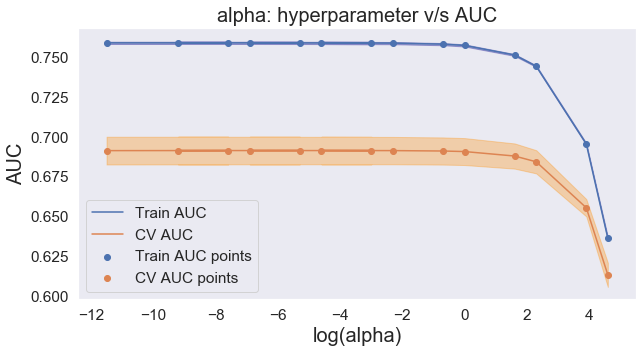

The Best Hyperparater is:  MultinomialNB(alpha=0.005, class_prior=[0.5, 0.5], fit_prior=True)


In [41]:
# Plotting AUC vs alpha: hyperparameter curve

plt.figure(figsize=(10,5))
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(log_alpha, cv_auc, label='CV AUC')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(alpha)", fontsize = 20)
plt.ylabel("AUC", fontsize = 20)
plt.title("alpha: hyperparameter v/s AUC", fontsize = 20)
plt.grid()
plt.show()

print("The Best Hyperparater is: ", clf.best_estimator_)

## Hyper parameter tuning on TFIDF features

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}   # values changed to interval(10^[-5] to 10^2) as suggested
clf = GridSearchCV(model, parameters, cv=10, scoring='roc_auc',return_train_score=True,n_jobs=-1) ## Usng Gridsearch
clf.fit(X_train_TFIDF, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']


# Taking log of all alpha values
import math

alpha = [0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

log_alpha = []
for values in tqdm(alpha):
    a = math.log(values)
    log_alpha.append(a)


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


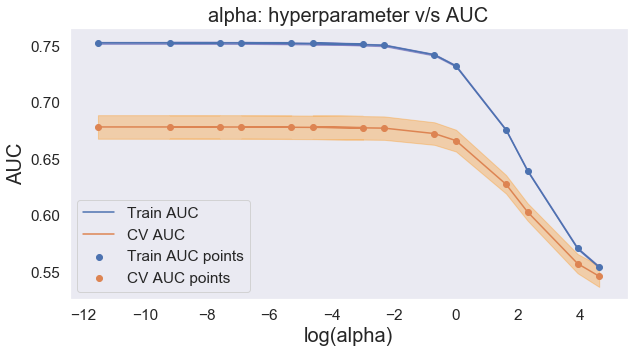

The Best Hyperparater is:  MultinomialNB(alpha=1e-05, class_prior=[0.5, 0.5], fit_prior=True)


In [43]:
# Plotting AUC vs alpha: hyperparameter curve

plt.figure(figsize=(10,5))
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(log_alpha, cv_auc, label='CV AUC')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(alpha)", fontsize = 20)
plt.ylabel("AUC", fontsize = 20)
plt.title("alpha: hyperparameter v/s AUC", fontsize = 20)
plt.grid()
plt.show()

print("The Best Hyperparater is: ", clf.best_estimator_)

## Testing the performance of our model at alpha=0.005 (In BOW) with test data

In [44]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

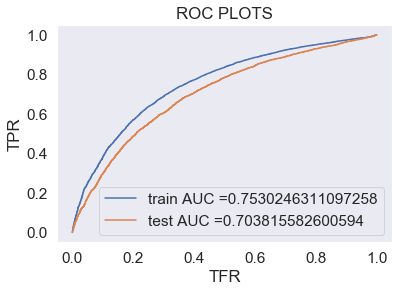

In [45]:
from sklearn.metrics import roc_curve, auc

best_alpha_bow=0.005
model = MultinomialNB(alpha=best_alpha_bow,class_prior=[0.5,0.5])
model.fit(X_train_BOW, y_train)


y_train_pred_BOW = batch_predict(model, X_train_BOW)    
y_test_pred_BOW = batch_predict(model, X_test_BOW)

train_fpr_BOW, train_tpr_BOW, train_thresholds_BOW = roc_curve(y_train, y_train_pred_BOW)
test_fpr_BOW, test_tpr_BOW, test_thresholds_BOW = roc_curve(y_test, y_test_pred_BOW)

plt.plot(train_fpr_BOW, train_tpr_BOW, label="train AUC ="+str(auc(train_fpr_BOW, train_tpr_BOW)))
plt.plot(test_fpr_BOW, test_tpr_BOW, label="test AUC ="+str(auc(test_fpr_BOW, test_tpr_BOW)))
AUC_BOW=auc(test_fpr_BOW, test_tpr_BOW)
plt.legend()
plt.xlabel("TFR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

## Testing the performance of our model at alpha=0.00001 (In TFIDF) with test data

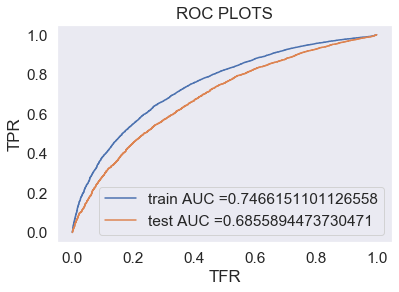

In [46]:
from sklearn.metrics import roc_curve, auc

best_alpha_tfidf= 0.00001
model = MultinomialNB(alpha=best_alpha_tfidf,class_prior=[0.5,0.5])
model.fit(X_train_TFIDF, y_train)

y_train_pred_TFIDF = batch_predict(model, X_train_TFIDF)    
y_test_pred_TFIDF = batch_predict(model, X_test_TFIDF)

train_fpr_TFIDF, train_tpr_TFIDF, train_thresholds_TFIDF = roc_curve(y_train, y_train_pred_TFIDF)
test_fpr_TFIDF, test_tpr_TFIDF, test_thresholds_TFIDF = roc_curve(y_test, y_test_pred_TFIDF)

plt.plot(train_fpr_TFIDF, train_tpr_TFIDF, label="train AUC ="+str(auc(train_fpr_TFIDF, train_tpr_TFIDF)))
plt.plot(test_fpr_TFIDF, test_tpr_TFIDF, label="test AUC ="+str(auc(test_fpr_TFIDF, test_tpr_TFIDF)))
AUC_TFIDF=auc(test_fpr_TFIDF, test_tpr_TFIDF)     
plt.legend()
plt.xlabel("TFR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

## Observation

1) As my AUC value both for train and test is >0.5, I can say that my model is sensible and good at alpha=0.005 and 0.00001

## ROC curve

1) I plot ROC curve by using FPR(False positive rate) on X-axis and TPR(true positive rate) on Y-axis

2) You can understand what is TPR and FPR by looking at confusion matrix

## CONFUSION MATRIX

In [47]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]   # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## Confusion matrix for Set 1 (BOW)

 The confusion matrix of model with BOW vectorization
************************************************************
      0     1
0  1665   977
1  4374  9484
************************************************************


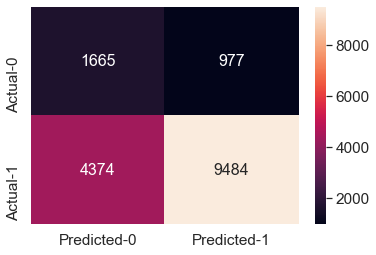

In [48]:
print (" The confusion matrix of model with BOW vectorization")
print("**"*30)
## Function calling
best_t = find_best_threshold(train_thresholds_BOW, train_fpr_BOW, train_tpr_BOW)
CF_MAT_BOW=pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred_BOW, best_t)))
print(CF_MAT_BOW)
print("**"*30)


## Ploting confusion matrix
CF_MAT_BOW.columns = ['Predicted-0','Predicted-1']
CF_MAT_BOW = CF_MAT_BOW.rename({0 : 'Actual-0', 1: 'Actual-1'})
sns.set(font_scale=1.4)
sns.heatmap(CF_MAT_BOW,annot=True,annot_kws={"size":16},fmt='g')




## Confusion matrix for Set 2 (TFIDF)

 The confusion matrix of model with TFIDF vectorization
************************************************************
      0     1
0  1675   967
1  5056  8802
************************************************************


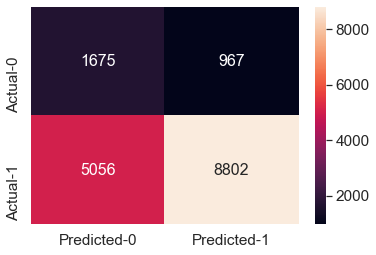

In [49]:
print (" The confusion matrix of model with TFIDF vectorization")
print("**"*30)
## Function calling
best_t = find_best_threshold(train_thresholds_TFIDF, train_fpr_TFIDF, train_tpr_TFIDF)
CF_MAT_TFIDF=pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred_TFIDF, best_t)))
print(CF_MAT_TFIDF)
print("**"*30)


#ploting confusion matrix
CF_MAT_TFIDF.columns=['Predicted-0','Predicted-1']
CF_MAT_TFIDF=CF_MAT_TFIDF.rename({0:'Actual-0',1:'Actual-1'})
sns.set(font_scale=1.4)
sns.heatmap(CF_MAT_TFIDF,annot= True,annot_kws={"size":16},fmt='g')


## Top 20 features of Set1 (BOW)

In [50]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
## Set 1 (Ctaegorical+Numerical+titles(BOW)+Essays(BOW))
from scipy.sparse import hstack
X_train_BOW = hstack((X_train_essay_bow, X_train_school_state_bow, X_train_teacher_prefix_bow, X_train_project_grade_category_bow,X_train_clean_categories_bow,X_train_clean_subcategories_bow, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_BOW = hstack((X_test_essay_bow, X_test_school_state_bow, X_test_teacher_prefix_bow, X_test_project_grade_category_bow,X_test_clean_categories_bow,X_test_clean_subcategories_bow, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_BOW.shape, y_train.shape)
print(X_test_BOW.shape, y_test.shape)
print('**'*50)

## Set 2 (Ctaegorical+Numerical+titles(TFIDF)+Essays(TFIDF))
X_train_TFIDF = hstack((X_train_essay_TF, X_train_school_state_TF, X_train_teacher_prefix_TF, X_train_project_grade_category_TF,X_train_clean_categories_TF,X_train_clean_subcategories_TF, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_TFIDF = hstack((X_test_essay_TF, X_test_school_state_TF, X_test_teacher_prefix_TF, X_test_project_grade_category_TF,X_test_clean_categories_TF,X_test_clean_subcategories_TF, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_TFIDF.shape, y_train.shape)
print(X_test_TFIDF.shape, y_test.shape)
print('**'*50)

(33500, 8101) (33500,)
(16500, 8101) (16500,)
****************************************************************************************************
(33500, 8101) (33500,)
(16500, 8101) (16500,)
****************************************************************************************************


In [51]:
MNB = MultinomialNB(alpha = 0.005,class_prior=[0.5,0.5])
MNB.fit(X_train_BOW, y_train)

MultinomialNB(alpha=0.005, class_prior=[0.5, 0.5], fit_prior=True)

In [52]:
print("The total number rows & columns in our dataset: ", X_train_BOW.shape)

The total number rows & columns in our dataset:  (33500, 8101)


In [53]:
bow_features_probs_negative = []
for a in range(8101) :     # as number of columns in our dataset is 8101 and so is total features
    bow_features_probs_negative.append(MNB.feature_log_prob_[0,a])
print(len(bow_features_probs_negative))

8101


In [54]:
bow_feature_names = []

for a in essay_feature_bow:
  bow_feature_names.append(a)

In [55]:
for a in school_state_feature_bow:
  bow_feature_names.append(a)

In [56]:
for a in teacher_prefix_feature_bow:
  bow_feature_names.append(a)

In [57]:
for a in project_grade_category_feature_bow:
  bow_feature_names.append(a)

In [58]:
for a in clean_categories_feature_bow:
  bow_feature_names.append(a)

In [59]:
for a in clean_subcategories_feature_bow:
  bow_feature_names.append(a)

In [60]:
bow_feature_names.append('price')
bow_feature_names.append('teacher_number_of_previously_posted_projects')

In [61]:
print(len(bow_feature_names))

8101


In [62]:
print("The total number rows & columns in our dataset: ", X_train_BOW.shape)

The total number rows & columns in our dataset:  (33500, 8101)


In [63]:
final_bow_features_negative = pd.DataFrame({'feature_names':bow_feature_names, 'feature_probs':bow_features_probs_negative})

In [64]:
df = final_bow_features_negative.sort_values(by = ['feature_probs'], ascending = True)

## Top 20 important features of Negative class of Set 1

In [65]:
df.head(20)

,feature_names,feature_probs
8098,warmth,-13.805614
8051,dr,-13.805614
8061,care_hunger,-13.805614
8068,warmth,-13.805614
8070,care_hunger,-13.805614
615,ball chair,-13.805614
8050,wy,-13.114958
8028,nd,-13.114958
6250,storyworks,-12.710324
1539,dash dot,-12.710324


##  Top 20 important features of positive class of Set 1

In [66]:
bow_features_probs_positive = []

for a in range(8101) :     # as number of columns in our dataset is 8101 and so is total features
    bow_features_probs_positive.append(MNB.feature_log_prob_[1,a])
print(len(bow_features_probs_positive))

8101


In [67]:
final_bow_features_positive = pd.DataFrame({'feature_names':bow_feature_names, 'feature_probs':bow_features_probs_positive})

In [68]:
df = final_bow_features_positive.sort_values(by = ['feature_probs'], ascending = True)

In [69]:
df.head(20)

,feature_names,feature_probs
8070,care_hunger,-15.523820
8098,warmth,-15.523820
8061,care_hunger,-15.523820
8068,warmth,-15.523820
8051,dr,-14.833163
8050,wy,-12.963473
8046,vt,-12.484047
8028,nd,-11.791018
8080,financialliteracy,-11.700057
8026,mt,-11.657502


## Summary


In [70]:
from prettytable import PrettyTable

x = PrettyTable(["Vectorization","Model", "Hyper-parameter tuning", "Hyper-parameter" ,"AUC_SCORE"])
x.add_row([" BOW ", "MultinomialNB","GridSearchCV", best_alpha_bow, AUC_BOW])
x.add_row([" TFIDF ","MultinomialNB", "GridSearchCV", best_alpha_tfidf, AUC_TFIDF])
print(x)

+---------------+---------------+------------------------+-----------------+--------------------+
| Vectorization |     Model     | Hyper-parameter tuning | Hyper-parameter |     AUC_SCORE      |
+---------------+---------------+------------------------+-----------------+--------------------+
|      BOW      | MultinomialNB |      GridSearchCV      |      0.005      | 0.703815582600594  |
|     TFIDF     | MultinomialNB |      GridSearchCV      |      1e-05      | 0.6855894473730471 |
+---------------+---------------+------------------------+-----------------+--------------------+


## Conclusion

1) My model is resonably good when I consider confusion matrix

2) Among BOW and TFIDF, I got better results for BOW model